In [1]:
#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "./input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "./input"]).decode("utf8"))

# Any results  written to the current directory are saved as output.


Python version: 3.7.5 (v3.7.5:5c02a39a0b, Oct 14 2019, 18:49:57) 
[Clang 6.0 (clang-600.0.57)]
pandas version: 1.0.3
matplotlib version: 3.2.1
NumPy version: 1.19.4
SciPy version: 1.5.4
IPython version: 7.19.0
scikit-learn version: 0.23.2
-------------------------
propublica-violent-recidivism.csv



In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
# from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
#import data from file
data_raw = pd.read_csv('./input/propublica-violent-recidivism.csv')


#to play with our data we'll create a copy
data1 = data_raw.copy(deep = True)

#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1]


#preview data
print (data_raw.info()) 
data_raw.sample(10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       4743 non-null   int64  
 1   name                     4743 non-null   object 
 2   first                    4743 non-null   object 
 3   last                     4743 non-null   object 
 4   compas_screening_date    4743 non-null   object 
 5   sex                      4743 non-null   object 
 6   dob                      4743 non-null   object 
 7   age_cat                  4743 non-null   object 
 8   race                     4743 non-null   object 
 9   juv_fel_count            4743 non-null   int64  
 10  decile_score             4743 non-null   int64  
 11  juv_misd_count           4743 non-null   int64  
 12  juv_other_count          4743 non-null   int64  
 13  priors_count             4743 non-null   int64  
 14  days_b_screening_arrest 

,id,name,first,last,compas_screening_date,sex,dob,age_cat,race,juv_fel_count,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
3896,9005,carly grimes,carly,grimes,2013-08-07,Female,1988-01-09,25 - 45,Caucasian,0,...,Low,2013-08-07,2013-08-05,2013-08-06,1,0,968,0,0,0
3779,8752,cody carlson,cody,carlson,2013-05-28,Male,1986-10-25,25 - 45,Caucasian,0,...,Low,2013-05-28,2013-05-27,2013-05-28,1,0,1039,0,0,0
739,1663,magda ramos,magda,ramos,2013-02-12,Female,1975-10-09,25 - 45,Hispanic,0,...,Low,2013-02-12,NaN,NaN,1,0,1144,0,0,0
2958,6801,edmund bruguier,edmund,bruguier,2013-10-04,Male,1971-06-27,25 - 45,Caucasian,0,...,Medium,2013-10-04,2013-10-03,2013-10-04,1,0,910,0,0,0
741,1665,ephrain caneus,ephrain,caneus,2013-03-27,Male,1982-03-07,25 - 45,African-American,0,...,Medium,2013-03-27,NaN,NaN,1,0,1101,0,0,0
3527,8164,joey stroud,joey,stroud,2013-08-02,Male,1986-02-28,25 - 45,African-American,0,...,Low,2013-08-02,2013-08-01,2013-08-02,5,0,973,0,0,0
2034,4641,elizabeth maddox,elizabeth,maddox,2013-01-02,Female,1981-02-20,25 - 45,Caucasian,0,...,Low,2013-01-02,2013-01-01,2013-01-02,1,0,1185,0,0,0
2093,4772,bernard parker,bernard,parker,2013-01-21,Male,1991-08-16,Less than 25,African-American,0,...,Medium,2013-01-21,2013-01-20,2013-01-21,0,0,1166,0,0,0
2812,6481,bria harcum,bria,harcum,2013-01-31,Female,1992-06-19,Less than 25,African-American,0,...,Low,2013-01-31,2014-07-07,2014-07-22,0,1,522,0,0,0
3307,7634,troy paul,troy,paul,2013-03-13,Male,1979-08-08,25 - 45,African-American,0,...,Low,2013-03-13,2013-03-13,2013-03-13,0,0,1115,0,0,0


In [4]:
features = [
    'sex',
#     'age',
    'age_cat',
    'race',
    'juv_fel_count',
    'decile_score',
    'juv_misd_count',
    'juv_other_count',
    'priors_count',
#     'c_days_from_compas',
    'c_charge_degree',
#     'c_charge_desc',
    'is_recid',
    'score_text',
    'v_score_text',
    'two_year_recid'
]
data1 = data1[features]

In [5]:
print('Train columns with null values:\n', data1.isnull().sum())
print("-"*10)


data_raw.describe(include = 'all')

Train columns with null values:
 sex                0
age_cat            0
race               0
juv_fel_count      0
decile_score       0
juv_misd_count     0
juv_other_count    0
priors_count       0
c_charge_degree    0
is_recid           0
score_text         5
v_score_text       0
two_year_recid     0
dtype: int64
----------


,id,name,first,last,compas_screening_date,sex,dob,age_cat,race,juv_fel_count,...,v_score_text,v_screening_date,in_custody,out_custody,priors_count.1,start,end,event,two_year_recid,two_year_recid.1
count,4743.000000,4743,4743,4743,4743,4743,4743,4743,4743,4743.000000,...,4743,4743,4534,4534,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000,4743.000000
unique,NaN,4721,2114,2897,586,2,3978,3,6,NaN,...,3,586,1003,1012,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,james adams,michael,williams,2013-09-23,Male,1995-01-17,25 - 45,African-American,NaN,...,Low,2013-09-23,2014-01-04,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,95,49,24,3746,4,2699,2266,NaN,...,3389,24,19,27,NaN,NaN,NaN,NaN,NaN,NaN
mean,5454.230445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045330,...,NaN,NaN,NaN,NaN,2.677209,9.084124,730.143369,0.165507,0.163399,0.163399
std,3189.515451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.420694,...,NaN,NaN,NaN,NaN,4.084277,36.867544,365.435158,0.371677,0.369768,0.369768
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2631.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.000000,422.500000,0.000000,0.000000,0.000000
50%,5475.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,1.000000,0.000000,837.000000,0.000000,0.000000,0.000000
75%,8239.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,3.000000,1.000000,1039.000000,0.000000,0.000000,0.000000


In [6]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
# data1['c_days_from_compas'].fillna(0, inplace = True)
#complete embarked with mode
# data1['c_charge_desc'].fillna(data1['c_charge_desc'].mode()[0], inplace = True)
#complete missing fare with median
data1['score_text'].fillna(data1['score_text'].mode()[0], inplace = True)

# drop_column = ['id']
# data1.drop(drop_column,  axis=1, inplace=True)    

print(data1.isnull().sum())
print("-"*10)
    

sex                0
age_cat            0
race               0
juv_fel_count      0
decile_score       0
juv_misd_count     0
juv_other_count    0
priors_count       0
c_charge_degree    0
is_recid           0
score_text         0
v_score_text       0
two_year_recid     0
dtype: int64
----------


In [7]:
print (data1.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sex              4743 non-null   object
 1   age_cat          4743 non-null   object
 2   race             4743 non-null   object
 3   juv_fel_count    4743 non-null   int64 
 4   decile_score     4743 non-null   int64 
 5   juv_misd_count   4743 non-null   int64 
 6   juv_other_count  4743 non-null   int64 
 7   priors_count     4743 non-null   int64 
 8   c_charge_degree  4743 non-null   object
 9   is_recid         4743 non-null   int64 
 10  score_text       4743 non-null   object
 11  v_score_text     4743 non-null   object
 12  two_year_recid   4743 non-null   int64 
dtypes: int64(7), object(6)
memory usage: 481.8+ KB
None


In [8]:
# data1['c_charge_desc'].unique() 

In [9]:
#CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

#code categorical data
label = LabelEncoder()
# label encoder mark the sample according to its order:
# for example: LabelEncoder.fit_transform([1, 1, 100, 67, 5]) will get ([0, 0, 3, 2, 1])
# NOTE: why using LabelEncoder() ?

# Sex: Male, Female => 0, 1
data1['sex_code'] = label.fit_transform(data1['sex'])
# age_cat (age category): 'Greater than 45', '25 - 45', 'Less than 25' => 1, 0, 2
data1['age_cat_code'] = label.fit_transform(data1['age_cat'])
# race: 'Other', 'African-American', 'Caucasian', 'Hispanic', 'Asian', 'Native American
data1['race_code'] = label.fit_transform(data1['race'])
# c_charge_degree: 'F', 'M'
data1['c_charge_degree_code'] = label.fit_transform(data1['c_charge_degree'])
# c_charge_desc: 
# data1['c_charge_desc_code'] = label.fit_transform(data1['c_charge_desc'])
data1['score_text_code'] = label.fit_transform(data1['score_text'])
data1['v_score_text_code'] = label.fit_transform(data1['v_score_text'])


#define y variable aka target/outcome
Target = ['two_year_recid']

#define x variables for original features aka feature selection
data1_x = features[:-1]
data1_x_calc = [
    'sex_code',
#     'age',
    'age_cat_code',
    'race_code',
    'juv_fel_count',
    'decile_score',
    'juv_misd_count',
    'juv_other_count',
    'priors_count',
#     'c_days_from_compas',
    'c_charge_degree_code',
#     'c_charge_desc_code',
    'is_recid',
    'score_text_code', 
    'v_score_text_code',
] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')



Original X Y:  ['two_year_recid', 'sex', 'age_cat', 'race', 'juv_fel_count', 'decile_score', 'juv_misd_count', 'juv_other_count', 'priors_count', 'c_charge_degree', 'is_recid', 'score_text', 'v_score_text'] 



In [10]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

Train columns with null values: 
 sex                     0
age_cat                 0
race                    0
juv_fel_count           0
decile_score            0
juv_misd_count          0
juv_other_count         0
priors_count            0
c_charge_degree         0
is_recid                0
score_text              0
v_score_text            0
two_year_recid          0
sex_code                0
age_cat_code            0
race_code               0
c_charge_degree_code    0
score_text_code         0
v_score_text_code       0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sex                   4743 non-null   object
 1   age_cat               4743 non-null   object
 2   race                  4743 non-null   object
 3   juv_fel_count         4743 non-null   int64 
 4   decile_score          4743 non-null 

In [11]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], test_size=0.25, random_state = 0)
print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))
train1_x.head()

Data1 Shape: (4743, 19)
Train1 Shape: (3557, 12)
Test1 Shape: (1186, 12)


,sex_code,age_cat_code,race_code,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_charge_degree_code,is_recid,score_text_code,v_score_text_code
2310,1,0,2,0,3,0,0,5,0,0,1,1
527,0,0,0,0,7,0,0,3,0,0,2,1
2948,1,1,2,0,2,0,0,1,1,0,1,1
2666,1,0,0,0,6,0,0,6,1,0,2,2
3862,1,0,0,0,4,0,0,1,0,1,1,2


In [12]:
#Discrete Variable Correlation by Survival using
#group by aka pivot table
for x in data1_x:
    if data1[x].dtype != 'float64' :
        print('two_year_recid Correlation by:', x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print('-'*10, '\n')
        

two_year_recid Correlation by: sex
      sex  two_year_recid
0  Female        0.098295
1    Male        0.180726
---------- 

two_year_recid Correlation by: age_cat
           age_cat  two_year_recid
0          25 - 45        0.177103
1  Greater than 45        0.074423
2     Less than 25        0.240000
---------- 

two_year_recid Correlation by: race
               race  two_year_recid
0  African-American        0.207855
1             Asian        0.148148
2         Caucasian        0.122869
3          Hispanic        0.115721
4   Native American        0.272727
5             Other        0.125000
---------- 

two_year_recid Correlation by: juv_fel_count
   juv_fel_count  two_year_recid
0              0        0.156081
1              1        0.440860
2              2        0.318182
3              3        0.166667
4              4        0.250000
5              5        1.000000
6              6        1.000000
7              8        1.000000
8             20        1.000000
------

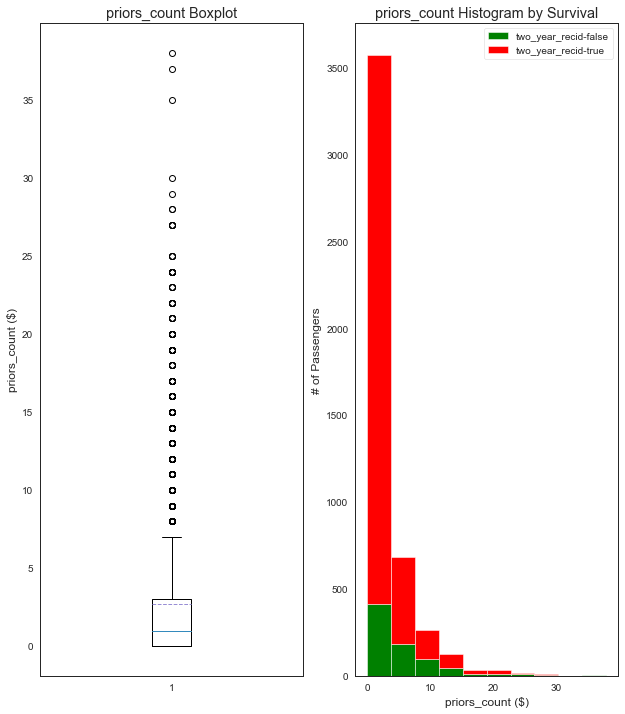

In [13]:
plt.figure(figsize=[16,12])

plt.subplot(131)
plt.boxplot(x=data1['priors_count'], showmeans = True, meanline = True)
plt.title('priors_count Boxplot')
plt.ylabel('priors_count ($)')

# plt.subplot(232)
# plt.boxplot(data1['age'], showmeans = True, meanline = True)
# plt.title('age Boxplot')
# plt.ylabel('age (Years)')

# plt.subplot(233)
# plt.boxplot(data1['c_days_from_compas'], showmeans = True, meanline = True)
# plt.title('c_days_from_compas Boxplot')
# plt.ylabel('c_days_from_compas (#)')

plt.subplot(132)
plt.hist(x = [data1[data1['two_year_recid']==1]['priors_count'], data1[data1['two_year_recid']==0]['priors_count']], 
         stacked=True, color = ['g','r'],label = ['two_year_recid-false','two_year_recid-true'])
plt.title('priors_count Histogram by Survival')
plt.xlabel('priors_count ($)')
plt.ylabel('# of Passengers')
plt.legend()

# plt.subplot(133)
# plt.hist(x = [data1[data1['two_year_recid']==1]['age'], data1[data1['two_year_recid']==0]['age']], 
#          stacked=True, color = ['g','r'],label = ['two_year_recid','true'])
# plt.title('age Histogram by Survival')
# plt.xlabel('age (Years)')
# plt.ylabel('# of Passengers')
# plt.legend()

# plt.subplot(236)
# plt.hist(x = [data1[data1['two_year_recid']==1]['c_days_from_compas'], data1[data1['two_year_recid']==0]['c_days_from_compas']], 
#          stacked=True, color = ['g','r'],label = ['two_year_recid','true'])
# plt.title('c_days_from_compas Histogram by Survival')
# plt.xlabel('c_days_from_compas (#)')
# plt.ylabel('# of Passengers')
# plt.legend()

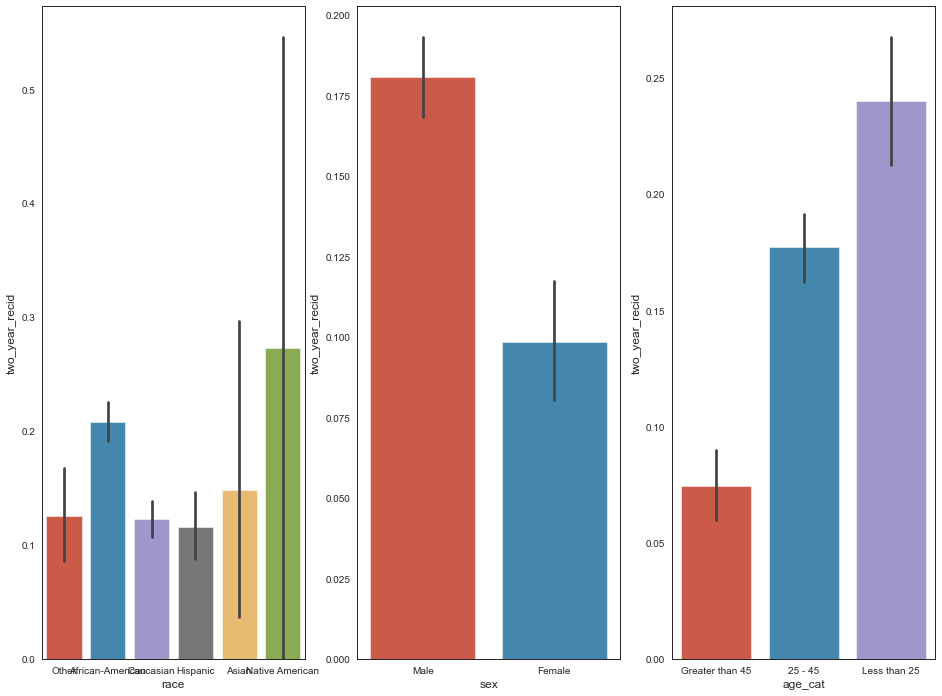

In [14]:
fig, (axis1,axis2,axis3) = plt.subplots(1, 3,figsize=(16,12))

sns.barplot(x = 'race', y = 'two_year_recid', data=data1, ax = axis1)
sns.barplot(x = 'sex', y = 'two_year_recid',  data=data1, ax = axis2)
sns.barplot(x = 'age_cat', y = 'two_year_recid', data=data1, ax = axis3)



Text(0.5, 1.0, 'sex vs score_text_code two_year_recid Comparison')

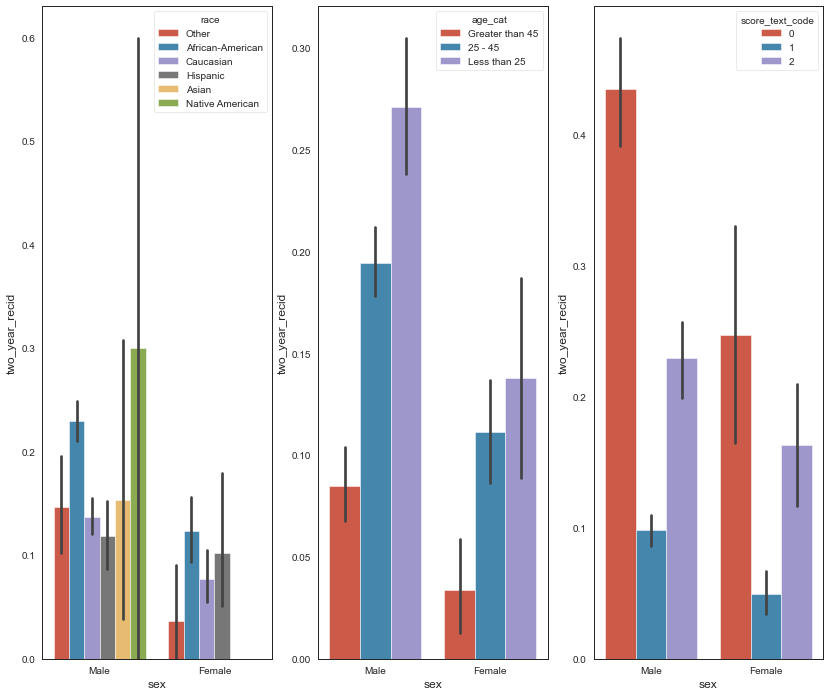

In [15]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'sex', y = 'two_year_recid', hue = 'race', data=data1, ax = qaxis[0])
axis1.set_title('sex vs race two_year_recid Comparison')

sns.barplot(x = 'sex', y = 'two_year_recid', hue = 'age_cat', data=data1, ax  = qaxis[1])
axis1.set_title('sex vs age_cat two_year_recid Comparison')

sns.barplot(x = 'sex', y = 'two_year_recid', hue = 'score_text_code', data=data1, ax  = qaxis[2])
axis1.set_title('sex vs score_text_code two_year_recid Comparison')


In [16]:
# pp = sns.pairplot(data1, hue = 'two_year_recid', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
# pp.set(xticklabels=[])

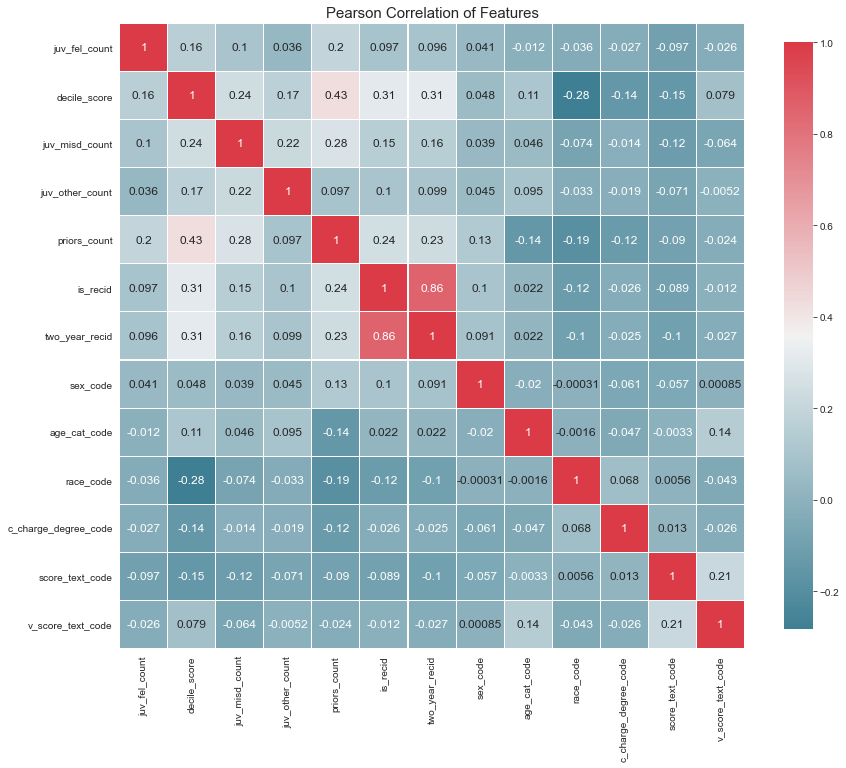

In [17]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data1)

In [18]:
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
#     ensemble.AdaBoostClassifier(),
#     ensemble.BaggingClassifier(),
#     ensemble.ExtraTreesClassifier(),
#     ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
#     gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
#     linear_model.PassiveAggressiveClassifier(),
#     linear_model.RidgeClassifierCV(),
#     linear_model.SGDClassifier(),
#     linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(), # prior is bernoulli
    naive_bayes.GaussianNB(),  # prior is gaussian
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
#     svm.SVC(probability=True),
#     svm.NuSVC(probability=True),
#     svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
#     tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
#     discriminant_analysis.LinearDiscriminantAnalysis(),
#     discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
#     XGBClassifier()    
    ]



#split dataset in cross-validation with this splitter class
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
# MLA_compare = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict = test1_y[Target]

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
#     MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
#     MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation
    alg.fit(train1_x, train1_y)
    
#     cv_results = model_selection.cross_validate(alg, data1[data1_x_calc], data1[Target], cv  = cv_split, return_train_score=True)

#     MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
#     MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
#     MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
#     MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
#     alg.fit(data1[data1_x_calc], data1[Target]) 
    MLA_predict[MLA_name] = alg.predict(test1_x) #alg.predict(data1[data1_x_calc])
    
    row_index+=1

    
#print and sort table:
# MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
# MLA_compare

In [19]:

# sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

# #prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
# plt.title('Machine Learning Algorithm Accuracy Score \n')
# plt.xlabel('Accuracy Score (%)')
# plt.ylabel('Algorithm')

In [20]:
MLA_predict

,two_year_recid,RandomForestClassifier,LogisticRegressionCV,BernoulliNB,GaussianNB,KNeighborsClassifier,DecisionTreeClassifier
1836,0,0,0,0,0,0,0
1835,0,0,0,0,0,0,0
3333,0,0,0,0,0,0,0
3083,1,1,1,1,1,0,1
2287,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1831,0,0,0,0,0,0,0
2899,1,1,1,0,1,0,1
2211,0,0,0,0,0,0,0
2027,1,1,1,1,1,1,1


In [21]:
train1_x_raw, test1_x_raw, train1_y_raw, test1_y_raw = model_selection.train_test_split(data1, data1[Target], test_size=0.25, random_state = 0)


In [22]:
train1_x_raw

,sex,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_recid,score_text,v_score_text,two_year_recid,sex_code,age_cat_code,race_code,c_charge_degree_code,score_text_code,v_score_text_code
2310,Male,25 - 45,Caucasian,0,3,0,0,5,F,0,Low,Low,0,1,0,2,0,1,1
527,Female,25 - 45,African-American,0,7,0,0,3,F,0,Medium,Low,0,0,0,0,0,2,1
2948,Male,Greater than 45,Caucasian,0,2,0,0,1,M,0,Low,Low,0,1,1,2,1,1,1
2666,Male,25 - 45,African-American,0,6,0,0,6,M,0,Medium,Medium,0,1,0,0,1,2,2
3862,Male,25 - 45,African-American,0,4,0,0,1,F,1,Low,Medium,1,1,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,Male,Greater than 45,African-American,0,2,0,0,3,M,0,Low,Low,0,1,1,0,1,1,1
3264,Male,25 - 45,African-American,0,5,0,0,1,F,0,Medium,Low,0,1,0,0,0,2,1
1653,Male,Greater than 45,Caucasian,0,1,0,0,1,M,0,Low,Low,0,1,1,2,1,1,1
2607,Male,Greater than 45,Caucasian,0,1,0,0,0,M,0,Low,Low,0,1,1,2,1,1,1


In [23]:
# create two subgroups of data -- african american & caucassian

data_aa = test1_x_raw[test1_x_raw['race'] == 'African-American']
data_ca = test1_x_raw[test1_x_raw['race'] == 'Caucasian']

In [24]:
# aa_idx = df.index[data_aa['BoolCol'] == True].tolist()

[[99  5]
 [ 0  7]]
[[315  20]
 [ 13  94]]


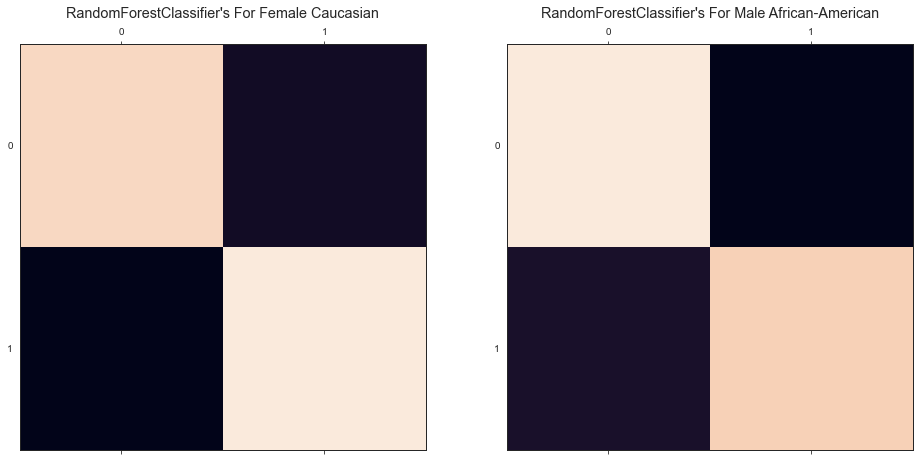

[[99  5]
 [ 0  7]]
[[309  26]
 [  0 107]]


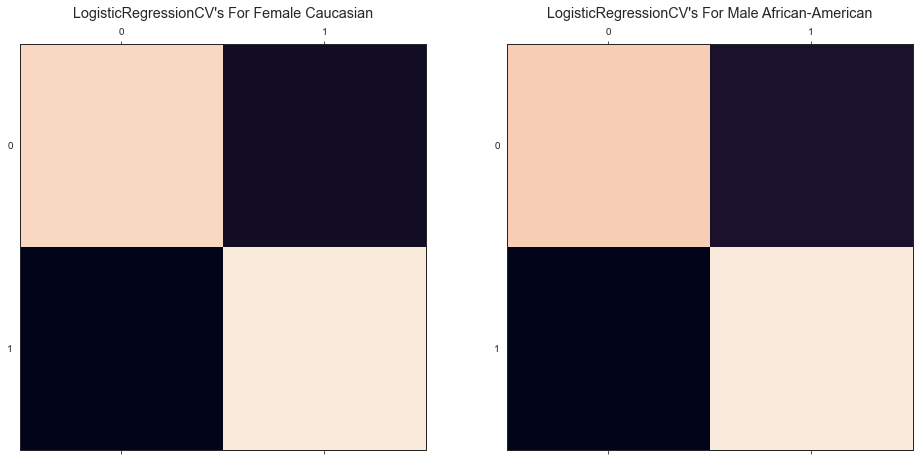

[[102   2]
 [  3   4]]
[[309  26]
 [  0 107]]


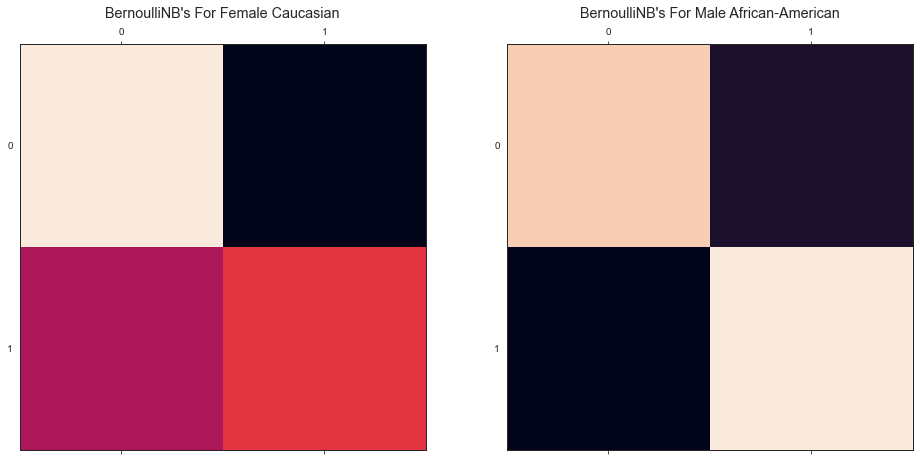

[[99  5]
 [ 0  7]]
[[309  26]
 [  0 107]]


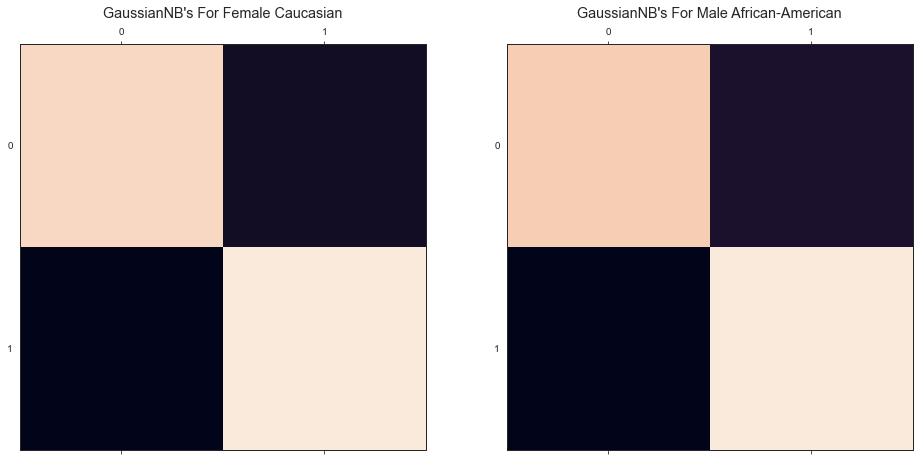

[[104   0]
 [  5   2]]
[[324  11]
 [ 57  50]]


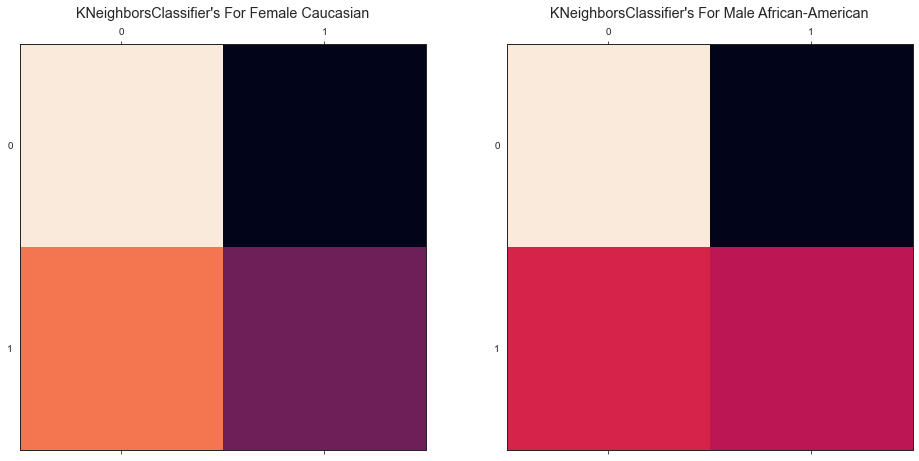

[[99  5]
 [ 0  7]]
[[320  15]
 [ 24  83]]


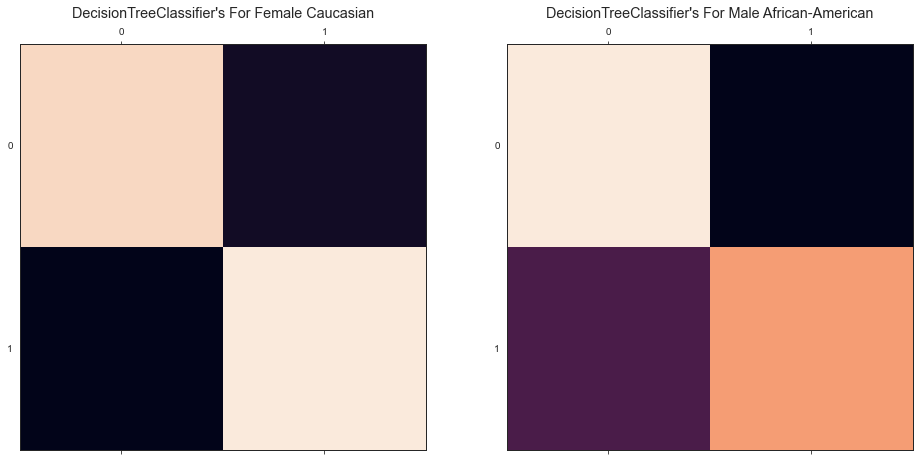

In [25]:
# pick candidate model to analysis its confusion matrix under two subgroups:
from sklearn.metrics import confusion_matrix
# caucassian women
data2 = test1_x_raw[(test1_x_raw['sex'] == 'Female') & (test1_x_raw['race'] == 'Caucasian')]
actual2 = data2[Target]
# african_america men
data3 = test1_x_raw[(test1_x_raw['sex'] == 'Male') & (test1_x_raw['race'] == 'African-American')]
actual3 = data3[Target]

for alg in MLA:
    fig, (ax1,ax2) = plt.subplots(1, 2,figsize=(16,12))
    pred = MLA_predict[alg.__class__.__name__].copy()
    pred = pred.loc[actual2.index.intersection(pred.index)]
    conf_mat = confusion_matrix(actual2, pred)
    print(conf_mat)
    conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
#     ax = fig.add_subplot(211)
    cax = ax1.matshow(conf_mat, interpolation='nearest')
#     fig.colorbar(cax)
    ax1.set_title(alg.__class__.__name__ + '\'s For Female Caucasian')

    pred = MLA_predict[alg.__class__.__name__].copy()
    pred = pred.loc[actual3.index.intersection(pred.index)]
#     plt.subplot(1, 10, MLA.index(alg) + 1)
    conf_mat = confusion_matrix(actual3, pred)
    print(conf_mat)
    conf_mat = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]
#     ax = fig.add_subplot(212)
    cax = ax2.matshow(conf_mat, interpolation='nearest')
#     fig.colorbar(cax)
    ax2.set_title(alg.__class__.__name__ + '\'s For Male African-American')
    plt.show()


RandomForestClassifier's DI score': 0.5804027966190128
LogisticRegressionCV's DI score': 0.5136743886743886
BernoulliNB's DI score': 0.3474903474903475
GaussianNB's DI score': 0.5136743886743886
KNeighborsClassifier's DI score': 0.38076069990963607
DecisionTreeClassifier's DI score': 0.5779994724094102


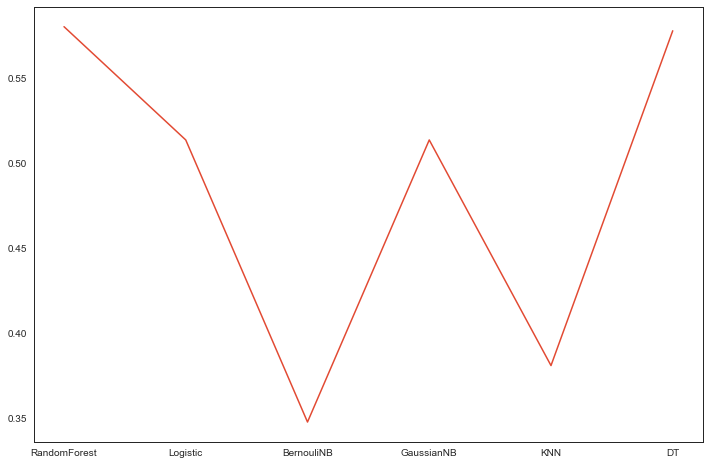

In [43]:
# calculate the DI score on baseline models
"""
Reference:
    Sorelle Friedler, Carlos Scheidegger, Suresh Venkatasubramanian, Sonam Choudhary, 
    Evan Hamilton and Derek Roth. 2018. "A comparative study of fairness-enhancing 
    interventions in machine learning. " arXiv:1802.04422v1 [stat.ML] 13 Feb 2018.
"""
def calc_prob_class_given_sensitive(predicted, sensitive, predicted_goal, sensitive_goal):
    """
    Returns P(predicted = predicted_goal | sensitive = sensitive_goal).  Assumes that predicted
    and sensitive have the same length.  If there are no attributes matching the given
    sensitive_goal, this will error.
    """
    match_count = 0.0
    total = 0.0
    for sens, pred in zip(sensitive, predicted):
        if str(sens) == str(sensitive_goal):
            total += 1
            if str(pred) == str(predicted_goal):
                match_count += 1

    return match_count / total


def calc(actual, predicted, dict_of_sensitive_lists, single_sensitive_name,
             unprotected_vals, positive_pred):
    """
    :param actual: label
    :param predicted: prediction
    :param dict_of_sensitive_lists: samples
    :param single_sensitive_name: focus on which feature, here is race
    :param unprotected_vals: ['African-American', 'Caucasian']
    :param positive_pred: 1, means that person has recid in two years
    """
    sensitive = dict_of_sensitive_lists[single_sensitive_name]  # only look at sample of feature "race"
    sensitive_values = list(set(sensitive))
    # the list is ['Other', 'Hispanic', 'African-American', 'Asian', 'Native American', 'Caucasian']
    
    if len(sensitive_values) <= 1:
         print("ERROR: Attempted to calculate DI without enough sensitive values:" + \
               str(sensitive_values))
         return 1.0

    # this list should only have one item in it
    what_is_this = [val for val in sensitive_values if val in unprotected_vals]
    # ['African-American', 'Caucasian']
    single_unprotected = [val for val in sensitive_values if val in unprotected_vals][0]
#     print(single_unprotected)
    # single_unprotected becomes only 'African-American'. Something wrong?
    unprotected_prob = calc_prob_class_given_sensitive(predicted, sensitive, positive_pred,
                                                       single_unprotected)

    sensitive_values.remove(single_unprotected)
    total = 0.0
    for sens in sensitive_values:
         pos_prob = calc_prob_class_given_sensitive(predicted, sensitive, positive_pred, sens)
         DI = 0.0
         if unprotected_prob > 0:
             DI = pos_prob / unprotected_prob
         if unprotected_prob == 0.0 and pos_prob == 0.0:
             DI = 1.0
         total += DI

    if total == 0.0:
         return 1.0

    return total / len(sensitive_values)

actual = test1_y_raw[Target]
dict_of_sensitive_lists = test1_x_raw
single_sensitive_name = 'sex'
# unprotected_vals = ['African-American', 'Caucasian']
unprotected_vals = ['Male']
positive_pred = 1
DI_res = []
# x_axis = ['GradientBoost', 'RandomForest', 'GaussianPro', 'Logistic', 'BernouliNB', 'GaussianNB', 'KNN', 'SVC', 'Linear', 'DT']
x_axis = ['RandomForest', 'Logistic', 'BernouliNB', 'GaussianNB', 'KNN', 'DT']
for alg in MLA:
    predicted = MLA_predict[alg.__class__.__name__]
    score = calc(actual, predicted, dict_of_sensitive_lists, single_sensitive_name, unprotected_vals, positive_pred)
    DI_res.append(score)
    print(alg.__class__.__name__ + "'s DI score': " + str(score))
# plot
plt.plot(x_axis, DI_res)
plt.show()

In [37]:
"""
References:
    .. [1] M. Feldman, S. A. Friedler, J. Moeller, C. Scheidegger, and
       S. Venkatasubramanian, "Certifying and removing disparate impact."
       ACM SIGKDD International Conference on Knowledge Discovery and Data
       Mining, 2015.
"""
# Run Feldman to repair our data set: repaired feature = sex, race
from BlackBoxAuditing.repairers.GeneralRepairer import Repairer
all_data = data1.values.tolist()
feature_list = data1.keys().to_list()
feature_to_repair = feature_list.index('sex')
repairer = Repairer(all_data, feature_to_repair, 1.0, False)
# repair level: 1.0, kdd=False
# if kdd, then do CategoricRepairer
# it is string, so use CategoricRepairer
repaired_sex_data = repairer.repair(all_data)
feature_to_repair = feature_list.index('race')
repairer = Repairer(repaired_sex_data, feature_to_repair, 1.0, False)
repaired_data = repairer.repair(repaired_sex_data)
print(repaired_data[:10])

[['Male', 'Greater than 45', 'African-American', 0, 1, 0, 0, 1, 'F', 0, 'Medium', 'Low', 0, 0, 0, 2, 0, 0, 0], ['Male', '25 - 45', 'African-American', 0, 4, 0, 0, 1, 'F', 1, 'Low', 'Low', 1, 0, 0, 2, 0, 0, 0], ['Male', 'Less than 25', 'African-American', 0, 7, 0, 0, 1, 'F', 0, 'Low', 'Low', 0, 0, 2, 2, 0, 0, 2], ['Male', '25 - 45', 'African-American', 0, 1, 0, 0, 1, 'F', 0, 'Low', 'Low', 0, 0, 0, 2, 0, 0, 0], ['Male', '25 - 45', 'African-American', 0, 1, 0, 0, 1, 'M', 0, 'Low', 'Low', 0, 0, 0, 2, 1, 0, 0], ['Male', '25 - 45', 'African-American', 0, 4, 0, 0, 1, 'F', 0, 'Low', 'Medium', 0, 0, 0, 2, 0, 0, 0], ['Male', '25 - 45', 'African-American', 0, 1, 0, 0, 1, 'M', 0, 'Low', 'Low', 0, 0, 0, 2, 1, 0, 0], ['Male', 'Less than 25', 'African-American', 0, 4, 0, 0, 1, 'F', 1, 'Low', 'Medium', 1, 0, 2, 2, 0, 0, 2], ['Male', '25 - 45', 'African-American', 0, 4, 0, 0, 1, 'F', 0, 'Low', 'Low', 0, 0, 0, 2, 0, 0, 0], ['Male', '25 - 45', 'African-American', 0, 1, 0, 0, 1, 'M', 0, 'Low', 'Low', 0, 0

In [28]:
# convert repaired_data (list) ro df
repaired_df = pd.DataFrame(repaired_data, columns=feature_list)
print(repaired_df.info())
repaired_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4743 entries, 0 to 4742
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sex                   4743 non-null   object
 1   age_cat               4743 non-null   object
 2   race                  4743 non-null   object
 3   juv_fel_count         4743 non-null   int64 
 4   decile_score          4743 non-null   int64 
 5   juv_misd_count        4743 non-null   int64 
 6   juv_other_count       4743 non-null   int64 
 7   priors_count          4743 non-null   int64 
 8   c_charge_degree       4743 non-null   object
 9   is_recid              4743 non-null   int64 
 10  score_text            4743 non-null   object
 11  v_score_text          4743 non-null   object
 12  two_year_recid        4743 non-null   int64 
 13  sex_code              4743 non-null   int64 
 14  age_cat_code          4743 non-null   int64 
 15  race_code             4743 non-null   

,sex,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_recid,score_text,v_score_text,two_year_recid,sex_code,age_cat_code,race_code,c_charge_degree_code,score_text_code,v_score_text_code
731,Male,Greater than 45,African-American,0,2,1,0,1,F,0,Low,Low,0,0,0,2,0,1,1
3958,Male,25 - 45,African-American,0,8,1,0,1,F,0,High,Low,0,0,0,2,0,1,1
2765,Male,Greater than 45,African-American,0,2,1,0,1,F,0,Low,Low,0,0,0,2,0,1,1
2735,Male,25 - 45,African-American,0,2,1,0,1,M,0,Low,Low,0,0,0,2,1,1,1
1291,Male,Greater than 45,African-American,0,8,1,0,1,F,0,Low,Low,0,0,0,2,0,1,1
3177,Male,25 - 45,African-American,0,8,1,0,1,F,0,Low,Low,0,0,0,2,0,1,1
4053,Male,Greater than 45,African-American,0,2,1,0,1,F,0,Low,Low,0,0,0,2,0,1,1
1148,Male,Less than 25,African-American,0,8,1,0,1,F,0,Low,Medium,0,0,2,2,0,1,1
2469,Male,Greater than 45,African-American,0,2,1,0,1,M,0,Low,Low,0,0,0,2,1,1,1
2382,Male,Greater than 45,African-American,0,2,1,0,1,F,0,Low,Low,0,0,0,2,0,1,1


In [29]:
repaired_df['two_year_recid'] = data1['two_year_recid']

Text(0.5, 1.0, 'sex vs score_text_code two_year_recid Comparison')

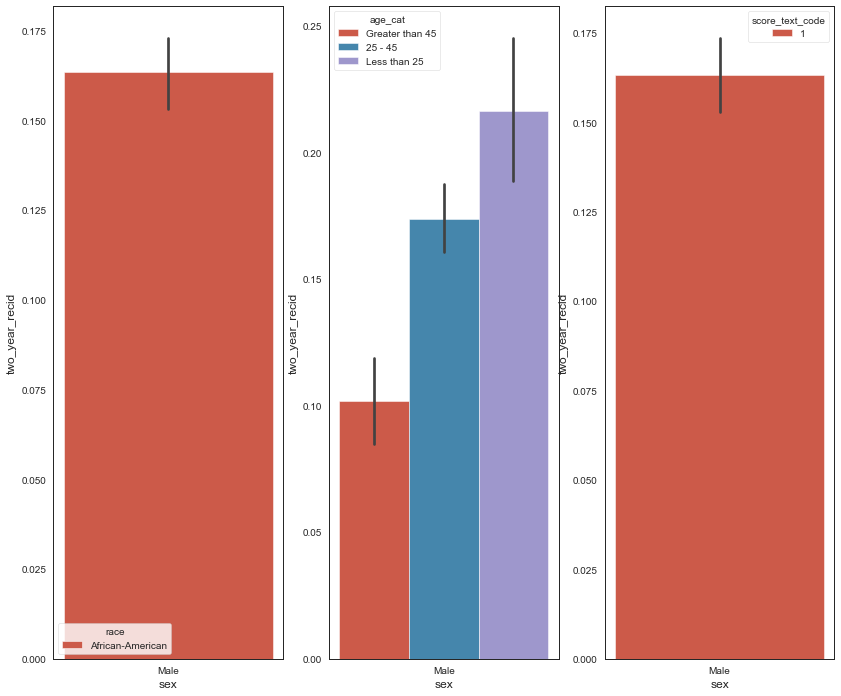

In [30]:
fig, qaxis = plt.subplots(1,3,figsize=(14,12))

sns.barplot(x = 'sex', y = 'two_year_recid', hue = 'race', data=repaired_df, ax = qaxis[0])
axis1.set_title('sex vs race two_year_recid Comparison')

sns.barplot(x = 'sex', y = 'two_year_recid', hue = 'age_cat', data=repaired_df, ax  = qaxis[1])
axis1.set_title('sex vs age_cat two_year_recid Comparison')

sns.barplot(x = 'sex', y = 'two_year_recid', hue = 'score_text_code', data=repaired_df, ax  = qaxis[2])
axis1.set_title('sex vs score_text_code two_year_recid Comparison')

# repair makes all male, and all african-american

In [31]:
repaired_df

,sex,age_cat,race,juv_fel_count,decile_score,juv_misd_count,juv_other_count,priors_count,c_charge_degree,is_recid,score_text,v_score_text,two_year_recid,sex_code,age_cat_code,race_code,c_charge_degree_code,score_text_code,v_score_text_code
0,Male,Greater than 45,African-American,0,2,1,0,1,F,0,Low,Low,0,0,0,2,0,1,1
1,Male,25 - 45,African-American,0,2,1,0,1,F,0,Low,Low,1,0,0,2,0,1,1
2,Male,Less than 25,African-American,0,8,1,0,1,F,0,Low,Medium,0,0,2,2,0,1,1
3,Male,25 - 45,African-American,0,2,1,0,1,F,0,Low,Low,0,0,0,2,0,1,1
4,Male,25 - 45,African-American,0,2,1,0,1,M,0,Low,Low,0,0,0,2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4738,Male,Greater than 45,African-American,0,8,1,0,1,F,0,High,Low,0,0,2,2,0,1,1
4739,Male,Less than 25,African-American,0,8,1,0,1,M,0,Low,Low,0,0,2,2,0,1,1
4740,Male,Less than 25,African-American,0,2,1,0,1,F,0,Low,Medium,0,0,2,2,0,1,1
4741,Male,Greater than 45,African-American,0,2,1,0,1,M,0,Low,Low,0,0,0,2,0,1,1


In [32]:
repaired_train1_x, repaired_test1_x, repaired_train1_y, repaired_test1_y = model_selection.train_test_split(repaired_df[data1_x_calc], repaired_df[Target], test_size=0.25, random_state = 0)


In [33]:
repaired_train1_x_raw, repaired_test1_x_raw, repaired_train1_y_raw, repaired_test1_y_raw = model_selection.train_test_split(repaired_df, repaired_df[Target], test_size=0.25, random_state = 0)


In [34]:
# create table to compare metrics after repair
# MLA_compare_after = pd.DataFrame(columns = MLA_columns)

#create table to compare MLA predictions
MLA_predict_after = repaired_test1_y[Target]
#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
#     MLA_compare_after.loc[row_index, 'MLA Name'] = MLA_name
#     MLA_compare_after.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation
#     cv_results = model_selection.cross_validate(alg, repaired_df[data1_x_calc], repaired_df[Target], cv  = cv_split, return_train_score=True)

#     MLA_compare_after.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
#     MLA_compare_after.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
#     MLA_compare_after.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
#     #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
#     MLA_compare_after.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(repaired_train1_x, train1_y)
#     alg.fit(repaired_df[data1_x_calc], repaired_df[Target])
    MLA_predict_after[MLA_name] = alg.predict(repaired_test1_x)#alg.predict(repaired_df[data1_x_calc])
    
    row_index+=1
    

    
# #print and sort table:
# MLA_compare_after.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
# MLA_compare_after

RandomForestClassifier's DI score': 1.0
LogisticRegressionCV's DI score': 1.0
BernoulliNB's DI score': 1.0
GaussianNB's DI score': 0.7650092840932535
KNeighborsClassifier's DI score': 1.0674659622028042
DecisionTreeClassifier's DI score': 1.0


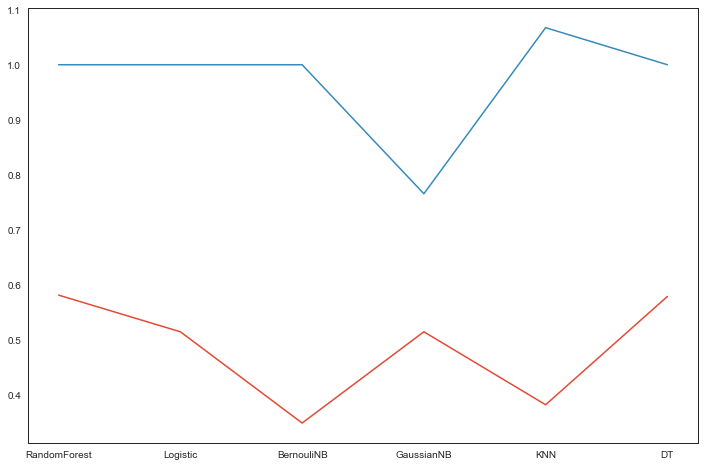

In [60]:
# calculate the DIavgall again
actual = repaired_test1_x_raw[Target]
# dict_of_sensitive_lists = repaired_test1_x_raw
dict_of_sensitive_lists = test1_x_raw
single_sensitive_name = 'sex'
# unprotected_vals = ['African-American', 'Caucasian']
unprotected_vals = ['Male']
positive_pred = 1
DI_res_repaired = []
for alg in MLA:
    predicted = MLA_predict_after[alg.__class__.__name__]
    score = calc(actual, predicted, dict_of_sensitive_lists, single_sensitive_name, unprotected_vals, positive_pred)
    DI_res_repaired.append(score)
    print(alg.__class__.__name__ + "'s DI score': " + str(score))

# plot
plt.plot(x_axis, DI_res, DI_res_repaired)
plt.show()

# the current DI calculation looks skecthy, looking for calibration (group condition)

In [52]:
#     """The meta algorithm here takes the fairness metric as part of the input
#     and returns a classifier optimized w.r.t. that fairness metric [11]_.
#     References:
#         .. [11] L. E. Celis, L. Huang, V. Keswani, and N. K. Vishnoi.
#            "Classification with Fairness Constraints: A Meta-Algorithm with
#            Provable Guarantees," 2018.
#     """
# # run Mega Algorithm
# # import the fairness metric to be used, here we use disparate impact, consistent with feldman above
from aif360.algorithms.inprocessing.celisMeta.StatisticalRate import StatisticalRate
tau = 0.8 # fairness penalty parameter
sens_index = data1_x_calc.index('sex_code')
x_train = train1_x.values.tolist()
# y_train = train1_y.values.tolist()
y_train = np.array([1 if y == 1 else
                           -1 for y in train1_y.values.tolist()])
x_control_train = []
for i in range(len(x_train)):
    x_control_train.append(x_train[i][sens_index])
# train the mega classifier
mega = StatisticalRate().getModel(tau, x_train, y_train, x_control_train)


Training Accuracy:  0.017149283103739088 , Training gamma:  0.9783611209648811


In [61]:
mega_predictions = []
for entry in test1_x.values:
    t = mega(entry)
    mega_predictions.append(int(t > 0))
DI_res_mega = calc(actual, mega_predictions, dict_of_sensitive_lists, single_sensitive_name, unprotected_vals, positive_pred)
print(DI_res_mega)


1.0231788079470199
